1.1.1 Image Color Order with different libaries

Text(0.5, 1.0, 'Red')

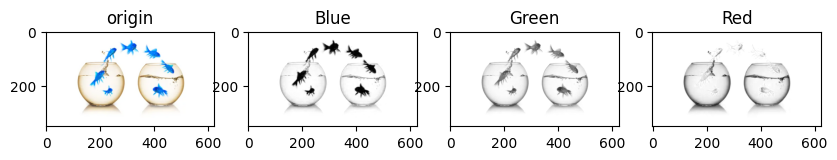

In [15]:
import cv2 
import matplotlib.pyplot as plt
image_path = 'image/fish.jpg'
image = cv2.imread(image_path)
fig = plt.figure(figsize=(10,10))
image_R = image[:,:,2]
image_G = image[:,:,1] 
image_B = image[:,:,0]

fig.add_subplot(1,4,1)
plt.imshow(image)
plt.title("origin")

fig.add_subplot(1,4,2)
plt.imshow(image_B,cmap='gray')
plt.title("Blue")

fig.add_subplot(1,4,3)
plt.imshow(image_G,cmap='gray')
plt.title("Green")

fig.add_subplot(1,4,4)
plt.imshow(image_R,cmap='gray')
plt.title("Red") # opencv


Text(0.5, 1.0, 'Blue')

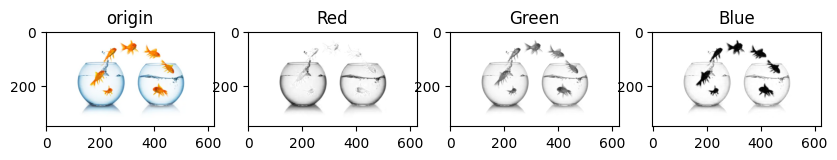

In [17]:
import numpy as np
import matplotlib.pyplot as plt

path = 'image/fish.jpg'
image = plt.imread(path) 
image_R = image[:,:,0]
image_G = image[:,:,1] 
image_B = image[:,:,2]
fig = plt.figure(figsize=(10,10))

fig.add_subplot(1,4,1)
plt.imshow(image)
plt.title("origin")

fig.add_subplot(1,4,2)
plt.imshow(image_R,cmap='gray')
plt.title("Red")

fig.add_subplot(1,4,3)
plt.imshow(image_G,cmap='gray')
plt.title("Green")

fig.add_subplot(1,4,4)
plt.imshow(image_B,cmap='gray')
plt.title("Blue") # opencv

1.1.2 Image Reshape

In [36]:
import numpy 
import cv2
import matplotlib.pyplot as plt
path = 'image/fuji.jpg'
image = plt.imread(path)

Transpose = np.transpose(image,(2,1,0))

Moveaxis = np.moveaxis(Transpose,source=1,destination=2)

# plt not support for show image channel first

1.1.3 Reduce Bit Depth using Quantization

(-0.5, 1279.5, 853.5, -0.5)

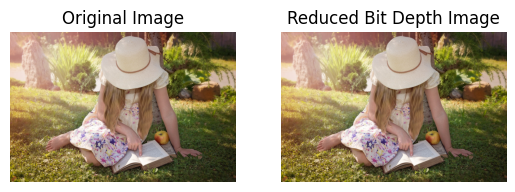

In [42]:
import cv2
import matplotlib.pyplot as plt
import math

path = 'image/girl.jpg'
image = cv2.imread(path)
new_image = image.copy()
def reduce_bitdepth(new_image, bitdepth):
    for y in range(new_image.shape[0]):
        for x in range(new_image.shape[1]):
            for c in range(new_image.shape[2]):
                new_image[y,x,c] =  math.floor((new_image[y,x,c] - 0)* (2**bitdepth - 1)/255)

reduce_bitdepth(new_image, 8)

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('Reduced Bit Depth Image')
plt.axis('off')


1.1.4 3D Image Surface

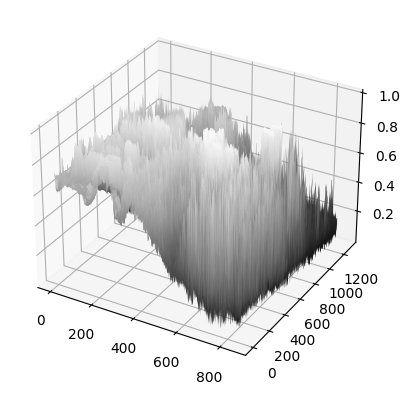

In [52]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

path = 'image/girl.jpg'
image = plt.imread(path)

# Convert the image to grayscale
gray_image = np.mean(image, axis=-1)

# Scale the pixel values between 0 and 1 for accurate plotting
gray_image = gray_image / 255.0

xx, yy = np.mgrid[0:gray_image.shape[0], 0:gray_image.shape[1]]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, gray_image, rstride=1, cstride=1, linewidth=0, cmap='gray')
plt.show()


1.2.1 Color Model Visualization

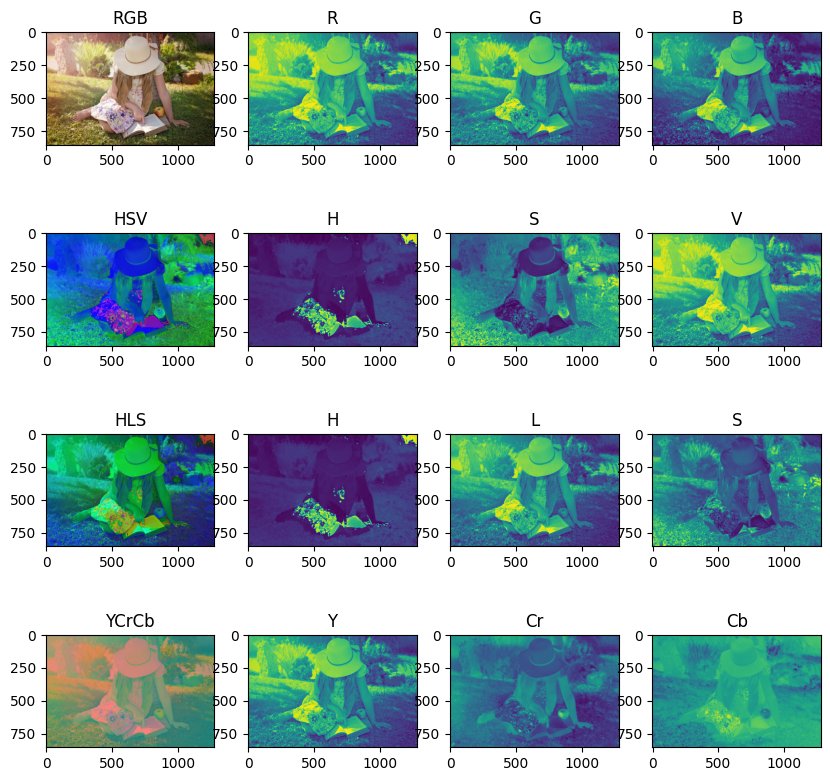

In [54]:
import cv2

path = 'image/girl.jpg'
image = cv2.imread(path)

rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV) 
hls_image = cv2.cvtColor(image,cv2.COLOR_BGR2HLS) 
ycrcb_image = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)

images = [rgb_image,hsv_image,hls_image,ycrcb_image]
components = [["RGB","R","G","B"],["HSV","H","S","V"],["HLS","H","L","S"],["YCrCb","Y","Cr","Cb"]]
fig = plt.figure(figsize=(10,10))
count = 1
for i in range(4): 
    for j in range(4):
        fig.add_subplot(4,4,count)
        if j == 0: 
            plt.imshow(images[i])
        else : 
            plt.imshow(images[i][:,:,j-1])
        plt.title(components[i][j])
        count += 1



1.2.2 Image Addtion

In [64]:
import cv2 

girl1 = cv2.imread("image/girl.jpg")
girl2 = cv2.imread("image/girl2.jpg")
girl2 = cv2.resize(girl2, (girl1.shape[1], girl1.shape[0]))

fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 2
output_video = 'output_video.avi'
frame_size = (girl1.shape[1], girl1.shape[0])

store = []
video_writer = cv2.VideoWriter(output_video, fourcc, fps, frame_size)

for i in range(20): 
    store.append(cv2.addWeighted(girl1, 1 - (i+1)/20, girl2, (i+1)/20, 0))

for frame in store: 
    video_writer.write(frame)

video_writer.release()


1.2.3 Image Bitwise AND operation

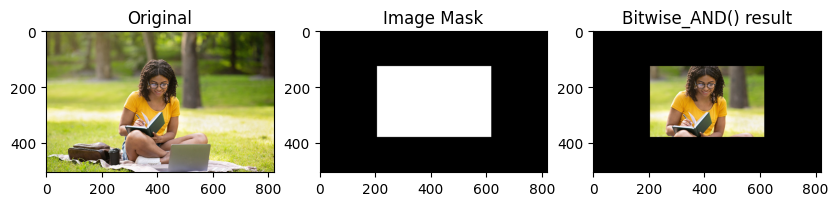

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create the filled_array mask with the same shape as the image
image = cv2.imread('image/girl2.jpg')
filled_array = np.full_like(image, 0)
cv2.rectangle(filled_array,(image.shape[1] // 4, image.shape[0] // 4),(3 * image.shape[1] // 4, 3 * image.shape[0] // 4), (255,255,255), -1)
# Perform bitwise AND operation between the image and the filled_array mask
mask_image = cv2.bitwise_and(image, filled_array)

# Display the images using matplotlib
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

fig.add_subplot(1, 3, 2)
plt.imshow(filled_array)
plt.title("Image Mask")

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB))
plt.title("Bitwise_AND() result")

plt.show()
